# Initialize

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pennylane as qml
from pennylane import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dropout

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [21]:
import sys
import importlib

# Import and reload the module
sys.path.append("../../../../../")
import Scripts.data_process_utils as dpu
importlib.reload(dpu)

<module 'Scripts.data_process_utils' from "/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/Notebook_Models/Pennylane_Models/Don't Touch/Model_Final_Pennylane_Keras_QNN_11_Features_6M_DS/Not So Good/../../../../../Scripts/data_process_utils.py">

In [22]:
import Scripts.evaluation_functions as eval
import importlib
importlib.reload(eval)

<module 'Scripts.evaluation_functions' from "/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/Notebook_Models/Pennylane_Models/Don't Touch/Model_Final_Pennylane_Keras_QNN_11_Features_6M_DS/Not So Good/../../../../../Scripts/evaluation_functions.py">

# Data Loading

In [23]:
finance_df=pd.read_csv("../../../../.././Datasets/PS_20174392719_1491204439457_log.csv",delimiter=',')
finance_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [24]:
df=finance_df

In [25]:
df=finance_df

num_samples = int(len(df) * 0.30)

df_sampled = df.groupby('step', group_keys=False).apply(lambda x: x.sample(frac=0.75, random_state=42))

df_sampled = df_sampled.sample(n=num_samples, random_state=42).reset_index(drop=True)

finance_df = df_sampled

df_sampled

/var/folders/_2/qt54y181481c0ncq4fj6g0940000gn/T/ipykernel_60303/3149082776.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby('step', group_keys=False).apply(lambda x: x.sample(frac=0.75, random_state=42))


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,402,PAYMENT,2293.60,C357857862,82351.00,80057.40,M1737315637,0.00,0.00,0,0
1,226,CASH_OUT,112620.18,C1690757109,128.00,0.00,C1858194355,0.00,112620.18,0,0
2,202,TRANSFER,41450.02,C186607867,7761.00,0.00,C996190755,0.00,41450.02,0,0
3,300,CASH_OUT,88887.47,C997373544,283.00,0.00,C247732967,2395169.12,2484056.59,0,0
4,235,TRANSFER,1059586.98,C1898581284,2010.00,0.00,C418902856,2456601.85,3516188.82,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1908781,400,CASH_IN,199255.80,C1443439100,92106.00,291361.80,C63022763,0.00,0.00,0,0
1908782,355,CASH_OUT,344019.25,C736748207,0.00,0.00,C1239114523,998029.93,1342049.18,0,0
1908783,276,CASH_IN,145108.10,C2144495050,11321.00,156429.10,C1494206372,278152.44,133044.34,0,0
1908784,37,CASH_OUT,189165.99,C251177355,0.00,0.00,C1815144574,817453.72,1006619.71,0,0


### Cleaning

In [26]:
df_cleaned = finance_df.loc[(finance_df['type'].isin(['CASH_OUT', 'TRANSFER'])),:]
df_cleaned.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],inplace=True)
df_cleaned['type'] = finance_df['type'].map({'CASH_OUT': 0, 'TRANSFER': 1})
df_cleaned

/var/folders/_2/qt54y181481c0ncq4fj6g0940000gn/T/ipykernel_60303/2790843773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],inplace=True)
/var/folders/_2/qt54y181481c0ncq4fj6g0940000gn/T/ipykernel_60303/2790843773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['type'] = finance_df['type'].map({'CASH_OUT': 0, 'TRANSFER': 1})


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1,226,0.0,112620.18,128.0,0.0,0.00,112620.18,0
2,202,1.0,41450.02,7761.0,0.0,0.00,41450.02,0
3,300,0.0,88887.47,283.0,0.0,2395169.12,2484056.59,0
4,235,1.0,1059586.98,2010.0,0.0,2456601.85,3516188.82,0
7,166,0.0,121642.51,0.0,0.0,1242803.12,1364445.63,0
...,...,...,...,...,...,...,...,...
1908771,282,0.0,76035.63,206.0,0.0,7804697.76,7880733.39,0
1908774,356,0.0,285232.19,85403.0,0.0,1230989.24,1516221.43,0
1908775,304,1.0,309477.24,0.0,0.0,3430765.32,3740242.56,0
1908782,355,0.0,344019.25,0.0,0.0,998029.93,1342049.18,0


In [27]:
df_smote_balanced = dpu.balance_with_smote(df_cleaned, target_col='isFraud', smote_ratio=0.1, random_state=42)
fraud_count_smote, fraud_percentage_smote = dpu.count_fraud_percentage(df_smote_balanced)
print(f"After SMOTE - Fraudulent: {fraud_count_smote}, Fraud Percentage: {fraud_percentage_smote:.2f}%")

After SMOTE - Fraudulent: 82810, Fraud Percentage: 9.09%


In [28]:
final_df=df_smote_balanced

In [29]:
y = final_df['isFraud']
X = final_df.drop(columns=['isFraud'])

In [30]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit only on training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # ✅ Fit only on train
X_test = scaler.transform(X_test)  # ✅ Use same scaler but don't fit again

Defining a QNode
================



In [31]:
import pennylane as qml
import numpy as np

n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits+1)

from itertools import combinations

def custom_layer(weights, n_qubits):
    index = 0  # Initialize index to track unique weights

    # Apply first set of RY gates
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1  # Increment index

    # Apply first set of CNOT gates
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply second set of RY gates
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1  # Increment index

    # Apply second set of CNOT gates
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply RY gates on qubit 3
    qml.RY(weights[index], wires=3)
    index += 1  # Increment index
    qml.RY(weights[index], wires=3)
    index += 1  # Increment index

    # Apply nested RY gates for two layers
    for j in range(2):
        for i in range(n_qubits):
            qml.RY(weights[index], wires=i)
            index += 1  # Increment index

    # Apply third set of CNOT gates
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply final set of RZ gates
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1  # Increment index

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    # print("AAAAAAAAAAAAAAAAAAAAA")
    # i=0
    for w in weights:
        # print(i)
        custom_layer(w,n_qubits)
        # i+=1
    outputs = [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]
    return outputs


In [32]:
import pennylane as qml
import numpy as np

n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits+1)

from itertools import combinations

def custom_layer_long(weights, n_qubits):
    index = 0  # Start index for weights

    # First block of RY
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1

    # First set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Second block of RY
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1

    # Second set of CNOT pairs
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Third block of RY (single qubit repeated)
    qml.RY(weights[index], wires=3)
    index += 1
    qml.RY(weights[index], wires=3)
    index += 1

    # Nested loop of RY
    for j in range(2):
        for i in range(n_qubits):
            qml.RY(weights[index], wires=i)
            index += 1

    # Third set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # First block of RZ
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1

    # Fourth set of CNOT pairs
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Fourth block of RY (single qubit repeated)
    qml.RY(weights[index], wires=3)
    index += 1
    qml.RY(weights[index], wires=3)
    index += 1

    # Second block of RZ
    for i in range(n_qubits):
        qml.RZ(weights[index], wires=i)
        index += 1

    # Third block of RY
    for i in range(n_qubits):
        qml.RY(weights[index], wires=i)
        index += 1

    # Fifth set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Final block of RZ
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1

    return index  # Total number of indices used

@qml.qnode(dev)
def qnode_long(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    # print("AAAAAAAAAAAAAAAAAAAAA")
    # i=0
    for w in weights:
        # print(i)
        custom_layer_long(w,n_qubits)
        # i+=1
    outputs = [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]
    return outputs

In [33]:
@qml.qnode(dev)
def qnode_long_solo(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    for w in weights:
        custom_layer_long(w,n_qubits)
    outputs = [qml.expval(qml.PauliZ(wires=0)),qml.expval(qml.PauliZ(wires=1))]
    return outputs

# Quantum Circuit



In [34]:
import pennylane as qml
import matplotlib.pyplot as plt

In [35]:
n_layers = 1
n_qubits=3
total_weights = 3 * (n_qubits + 1) + 2 * n_qubits + 2

weight_shapes = {"weights": (n_layers, total_weights+1)}

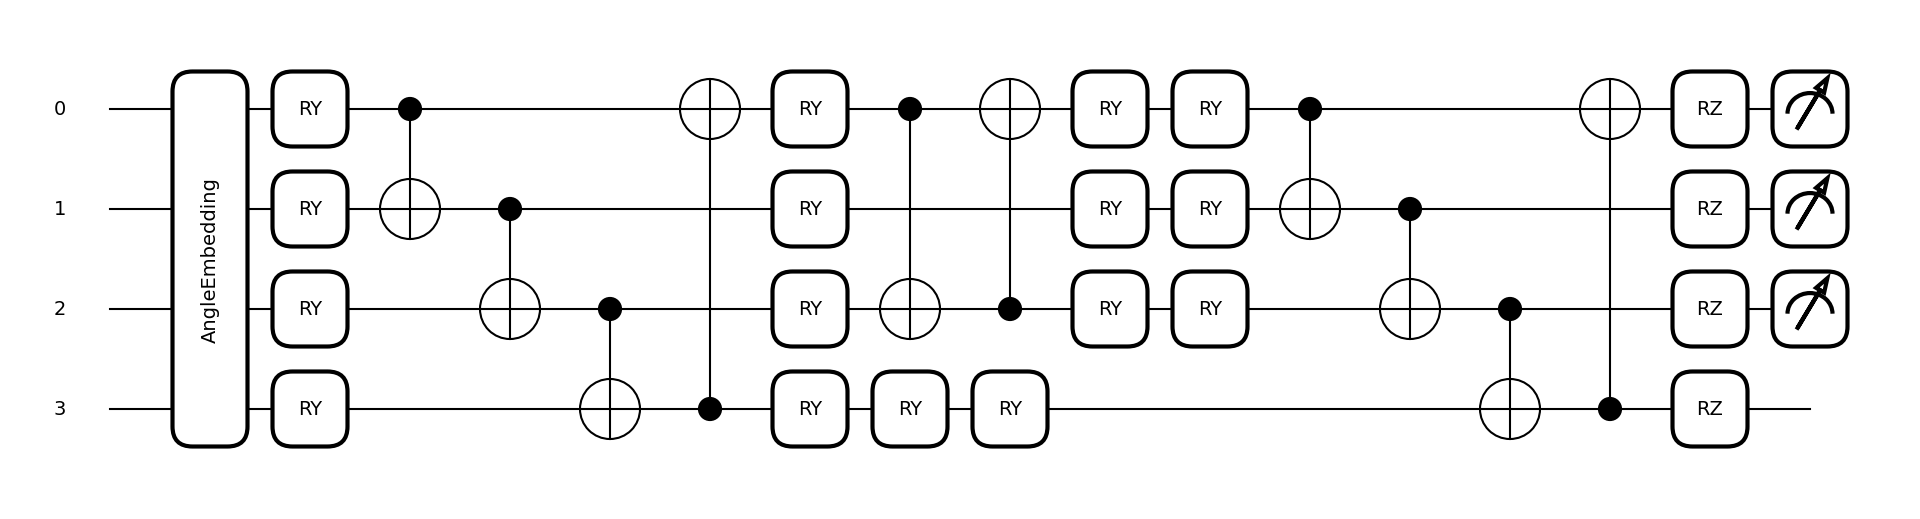

In [36]:
weights = np.random.random(size=(n_layers, total_weights))
fig, ax = qml.draw_mpl(qnode)(X_train[:, :4], weights)
plt.show()

In [37]:
n_layers = 1
n_qubits=3
total_weights_long = 32
print("Total weights required:", total_weights_long)

weight_shapes_long = {"weights": (n_layers, total_weights_long+1)}

Total weights required: 32


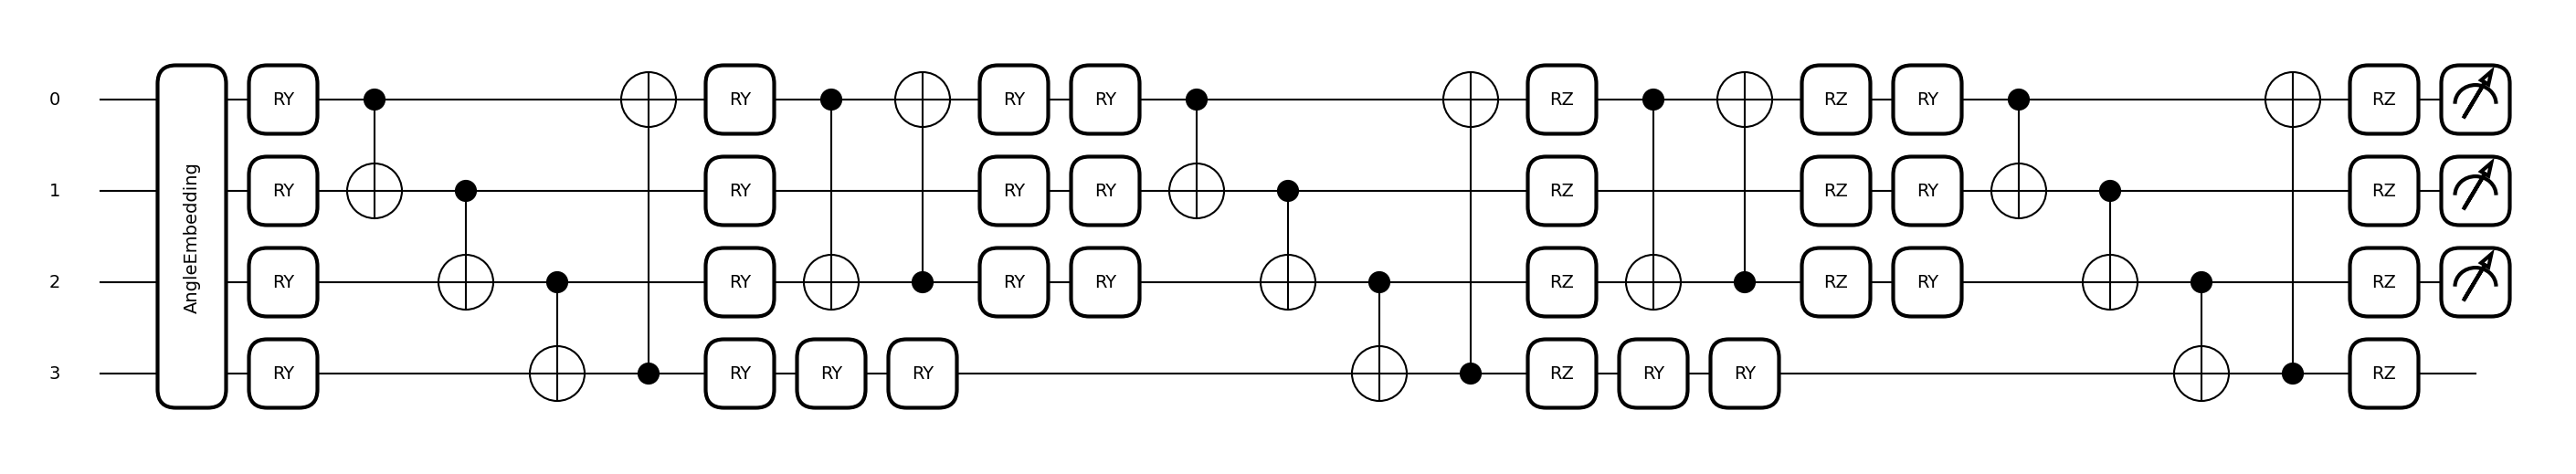

In [38]:
weights = np.random.random(size=(n_layers, total_weights_long))
fig, ax = qml.draw_mpl(qnode_long)(X_train[:, :4], weights)

plt.show()

In [39]:
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

In [40]:
qlayer_long = qml.qnn.KerasLayer(qnode_long, weight_shapes_long, output_dim=n_qubits)

# Checking The Influence of Quantum Model

For this to be implemented we lowered the amount of data used to have a faster run of the quantum circuit

In [41]:
from sklearn.metrics import classification_report

In [42]:
n_layers = 1
n_qubits=3
total_weights_long = 32
print("Total weights required:", total_weights_long)

weight_shapes_long = {"weights": (n_layers, total_weights_long+1)}

Total weights required: 32


In [43]:
qlayer_long = qml.qnn.KerasLayer(qnode_long, weight_shapes_long, output_dim=n_qubits)

In [45]:
import os
import json
os.makedirs("../experiment_12_long_layer", exist_ok=True) 
for i in range(5):
    print(f"Iteration {i+1}")

    print("Evaluating Classic Model")
    print("====================================================================================================================================")
    # Classic model
    classic_model = Sequential([
        Dense(8, activation=tf.nn.relu, input_shape=(X_train.shape[1],)),
        Dense(4, activation=tf.nn.relu),
        Dense(2, activation=tf.nn.softmax)
    ])
    classic_model.compile(optimizer=Adam(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    with tf.device('/CPU:0'):
        classical_history=classic_model.fit(X_train, y_train, validation_split=0.2, batch_size=512, epochs=5, shuffle=True, verbose=1)
    eval.evaluate_model(classic_model, X_test, y_test)
    # Save entire model (architecture + weights)
    classic_model.save(f"../experiment_12_long_layer/classic_model_iteration_{i+1}.h5")
    # Save only the weights
    classic_model.save_weights(f"../experiment_12_long_layer/classic_model_iteration_{i+1}_weights.h5")
    
        # Save training history as JSON
    with open(f"../experiment_12_long_layer/classic_model_iteration_{i+1}_history.json", "w") as f:
        json.dump(classical_history.history, f)
    
for i in range(5):
    print("Evaluating Quantum Model")
    print("====================================================================================================================================")

    quantum_model = Sequential([
        Dense(8, activation=tf.nn.relu, input_shape=(X_train.shape[1],)),
        Dense(4, activation=tf.nn.relu),
        qlayer_long,
        Dense(2, activation=tf.nn.softmax)
    ])

    quantum_model.compile(optimizer=Adam(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    with tf.device('/CPU:0'):
        quantum_history=quantum_model.fit(X_train, y_train, validation_split=0.2, batch_size=512, epochs=5, shuffle=True, verbose=1)
    
    eval.evaluate_model(quantum_model, X_test, y_test)
    
    # Save entire model
    quantum_model.save(f"../experiment_12_long_layer/quantum_model_iteration_{i+1}.h5")
    # Save only the weights
    quantum_model.save_weights(f"../experiment_12_long_layer/quantum_model_iteration_{i+1}_weights.h5")

    # Save training history as JSON
    with open(f"../experiment_12_long_layer/quantum_model_iteration_{i+1}_history.json", "w") as f:
        json.dump(quantum_history.history, f)
    
    print("====================================================================================================================================")


Iteration 1
Evaluating Classic Model
Epoch 1/5
1139/1139 [==============================] - 4s 3ms/step - loss: 0.0816 - accuracy: 0.9765 - val_loss: 0.0383 - val_accuracy: 0.9867
Epoch 2/5
1139/1139 [==============================] - 3s 3ms/step - loss: 0.0363 - accuracy: 0.9867 - val_loss: 0.0303 - val_accuracy: 0.9891
Epoch 3/5
1139/1139 [==============================] - 3s 3ms/step - loss: 0.0315 - accuracy: 0.9883 - val_loss: 0.0482 - val_accuracy: 0.9794
Epoch 4/5
1139/1139 [==============================] - 3s 3ms/step - loss: 0.0282 - accuracy: 0.9895 - val_loss: 0.0221 - val_accuracy: 0.9930
Epoch 5/5
1424/1424 [==============================] - 2s 1ms/step
Confusion Matrix:
[[165418    259]
 [  1512  14995]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    165677
           1       0.98      0.91      0.94     16507

    accuracy                           0.99    182184
   macro avg       0.99      

/Applications/anaconda3/envs/quantum_env_2/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1139/1139 [==============================] - 4s 3ms/step - loss: 0.1096 - accuracy: 0.9728 - val_loss: 0.0362 - val_accuracy: 0.9875
Epoch 2/5
1139/1139 [==============================] - 3s 3ms/step - loss: 0.0342 - accuracy: 0.9877 - val_loss: 0.0277 - val_accuracy: 0.9916
Epoch 3/5
1139/1139 [==============================] - 4s 3ms/step - loss: 0.0306 - accuracy: 0.9890 - val_loss: 0.0416 - val_accuracy: 0.9840
Epoch 4/5
1139/1139 [==============================] - 4s 3ms/step - loss: 0.0272 - accuracy: 0.9900 - val_loss: 0.0263 - val_accuracy: 0.9910
Epoch 5/5
1424/1424 [==============================] - 2s 1ms/step
Confusion Matrix:
[[165001    676]
 [   704  15803]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    165677
           1       0.96      0.96      0.96     16507

    accuracy                           0.99    182184
   macro avg       0.98      0.98      0.98    182184
weighted avg       0.9

/Applications/anaconda3/envs/quantum_env_2/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1139/1139 [==============================] - 4s 3ms/step - loss: 0.0856 - accuracy: 0.9709 - val_loss: 0.0474 - val_accuracy: 0.9836
Epoch 2/5
1139/1139 [==============================] - 3s 3ms/step - loss: 0.0471 - accuracy: 0.9842 - val_loss: 0.0368 - val_accuracy: 0.9886
Epoch 3/5
1139/1139 [==============================] - 3s 3ms/step - loss: 0.0397 - accuracy: 0.9866 - val_loss: 0.0446 - val_accuracy: 0.9848
Epoch 4/5
1139/1139 [==============================] - 3s 3ms/step - loss: 0.0377 - accuracy: 0.9872 - val_loss: 0.0325 - val_accuracy: 0.9891
Epoch 5/5
1424/1424 [==============================] - 2s 1ms/step
Confusion Matrix:
[[165066    611]
 [  1337  15170]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    165677
           1       0.96      0.92      0.94     16507

    accuracy                           0.99    182184
   macro avg       0.98      0.96      0.97    182184
weighted avg       0.9

/Applications/anaconda3/envs/quantum_env_2/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1139/1139 [==============================] - 4s 3ms/step - loss: 0.0755 - accuracy: 0.9747 - val_loss: 0.0422 - val_accuracy: 0.9847
Epoch 2/5
1139/1139 [==============================] - 3s 3ms/step - loss: 0.0391 - accuracy: 0.9864 - val_loss: 0.0319 - val_accuracy: 0.9887
Epoch 3/5
1139/1139 [==============================] - 3s 3ms/step - loss: 0.0305 - accuracy: 0.9892 - val_loss: 0.0258 - val_accuracy: 0.9902
Epoch 4/5
1139/1139 [==============================] - 3s 3ms/step - loss: 0.0274 - accuracy: 0.9901 - val_loss: 0.0248 - val_accuracy: 0.9922
Epoch 5/5
1424/1424 [==============================] - 2s 1ms/step
Confusion Matrix:
[[165044    633]
 [   662  15845]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    165677
           1       0.96      0.96      0.96     16507

    accuracy                           0.99    182184
   macro avg       0.98      0.98      0.98    182184
weighted avg       0.9

/Applications/anaconda3/envs/quantum_env_2/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1139/1139 [==============================] - 4s 3ms/step - loss: 0.0797 - accuracy: 0.9731 - val_loss: 0.0444 - val_accuracy: 0.9850
Epoch 2/5
1139/1139 [==============================] - 3s 3ms/step - loss: 0.0417 - accuracy: 0.9854 - val_loss: 0.0342 - val_accuracy: 0.9876
Epoch 3/5
1139/1139 [==============================] - 3s 3ms/step - loss: 0.0363 - accuracy: 0.9871 - val_loss: 0.0291 - val_accuracy: 0.9891
Epoch 4/5
1139/1139 [==============================] - 3s 3ms/step - loss: 0.0329 - accuracy: 0.9882 - val_loss: 0.0290 - val_accuracy: 0.9906
Epoch 5/5
1424/1424 [==============================] - 2s 1ms/step
Confusion Matrix:
[[163654   2023]
 [   250  16257]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    165677
           1       0.89      0.98      0.93     16507

    accuracy                           0.99    182184
   macro avg       0.94      0.99      0.96    182184
weighted avg       0.9

/Applications/anaconda3/envs/quantum_env_2/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1139/1139 [==============================] - 134s 118ms/step - loss: 0.0853 - accuracy: 0.9693 - val_loss: 0.0439 - val_accuracy: 0.9833
Epoch 2/5
1139/1139 [==============================] - 132s 116ms/step - loss: 0.0388 - accuracy: 0.9852 - val_loss: 0.0309 - val_accuracy: 0.9881
Epoch 3/5
1139/1139 [==============================] - 132s 116ms/step - loss: 0.0335 - accuracy: 0.9871 - val_loss: 0.0350 - val_accuracy: 0.9861
Epoch 4/5
1139/1139 [==============================] - 145s 128ms/step - loss: 0.0325 - accuracy: 0.9878 - val_loss: 0.0305 - val_accuracy: 0.9902
Epoch 5/5
1424/1424 [==============================] - 46s 32ms/step
Confusion Matrix:
[[164788    889]
 [   946  15561]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    165677
           1       0.95      0.94      0.94     16507

    accuracy                           0.99    182184
   macro avg       0.97      0.97      0.97    182184
weig

/Applications/anaconda3/envs/quantum_env_2/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1139/1139 [==============================] - 131s 115ms/step - loss: 0.0714 - accuracy: 0.9750 - val_loss: 0.0372 - val_accuracy: 0.9858
Epoch 2/5
1139/1139 [==============================] - 131s 115ms/step - loss: 0.0333 - accuracy: 0.9875 - val_loss: 0.0271 - val_accuracy: 0.9891
Epoch 3/5
1139/1139 [==============================] - 131s 115ms/step - loss: 0.0305 - accuracy: 0.9886 - val_loss: 0.0295 - val_accuracy: 0.9889
Epoch 4/5
1139/1139 [==============================] - 129s 113ms/step - loss: 0.0269 - accuracy: 0.9902 - val_loss: 0.0263 - val_accuracy: 0.9898
Epoch 5/5
1424/1424 [==============================] - 47s 33ms/step
Confusion Matrix:
[[164791    886]
 [   564  15943]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    165677
           1       0.95      0.97      0.96     16507

    accuracy                           0.99    182184
   macro avg       0.97      0.98      0.98    182184
weig

/Applications/anaconda3/envs/quantum_env_2/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1139/1139 [==============================] - 131s 115ms/step - loss: 0.0642 - accuracy: 0.9777 - val_loss: 0.0339 - val_accuracy: 0.9882
Epoch 2/5
1139/1139 [==============================] - 132s 116ms/step - loss: 0.0334 - accuracy: 0.9875 - val_loss: 0.0251 - val_accuracy: 0.9915
Epoch 3/5
1139/1139 [==============================] - 138s 121ms/step - loss: 0.0292 - accuracy: 0.9891 - val_loss: 0.0254 - val_accuracy: 0.9903
Epoch 4/5
1139/1139 [==============================] - 131s 115ms/step - loss: 0.0263 - accuracy: 0.9904 - val_loss: 0.0297 - val_accuracy: 0.9864
Epoch 5/5
1424/1424 [==============================] - 46s 32ms/step
Confusion Matrix:
[[165240    437]
 [  1064  15443]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    165677
           1       0.97      0.94      0.95     16507

    accuracy                           0.99    182184
   macro avg       0.98      0.97      0.97    182184
weig

/Applications/anaconda3/envs/quantum_env_2/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1139/1139 [==============================] - 130s 114ms/step - loss: 0.0989 - accuracy: 0.9646 - val_loss: 0.0413 - val_accuracy: 0.9867
Epoch 2/5
1139/1139 [==============================] - 131s 115ms/step - loss: 0.0358 - accuracy: 0.9866 - val_loss: 0.0281 - val_accuracy: 0.9888
Epoch 3/5
1139/1139 [==============================] - 128s 112ms/step - loss: 0.0298 - accuracy: 0.9886 - val_loss: 0.0250 - val_accuracy: 0.9904
Epoch 4/5
1139/1139 [==============================] - 130s 114ms/step - loss: 0.0278 - accuracy: 0.9896 - val_loss: 0.0216 - val_accuracy: 0.9923
Epoch 5/5
1424/1424 [==============================] - 52s 37ms/step
Confusion Matrix:
[[164045   1632]
 [   332  16175]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    165677
           1       0.91      0.98      0.94     16507

    accuracy                           0.99    182184
   macro avg       0.95      0.99      0.97    182184
weig

/Applications/anaconda3/envs/quantum_env_2/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1139/1139 [==============================] - 141s 124ms/step - loss: 0.0904 - accuracy: 0.9682 - val_loss: 0.0632 - val_accuracy: 0.9807
Epoch 2/5
1139/1139 [==============================] - 143s 126ms/step - loss: 0.0438 - accuracy: 0.9848 - val_loss: 0.0366 - val_accuracy: 0.9876
Epoch 3/5
1139/1139 [==============================] - 142s 125ms/step - loss: 0.0401 - accuracy: 0.9865 - val_loss: 0.0326 - val_accuracy: 0.9889
Epoch 4/5
1139/1139 [==============================] - 142s 124ms/step - loss: 0.0358 - accuracy: 0.9877 - val_loss: 0.0281 - val_accuracy: 0.9912
Epoch 5/5
1424/1424 [==============================] - 51s 36ms/step
Confusion Matrix:
[[164827    850]
 [  1218  15289]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    165677
           1       0.95      0.93      0.94     16507

    accuracy                           0.99    182184
   macro avg       0.97      0.96      0.97    182184
weig

In [ ]:
# import pandas as pd

# # Assuming X_train, Y_train, and X_test are your datasets
# # Convert them to DataFrames if they are not already
# X_train_df = pd.DataFrame(X_train)
# Y_train_df = pd.DataFrame(y_train)
# X_test_df = pd.DataFrame(X_test)
# y_test_df = pd.DataFrame(y_test)
# # Save the datasets to CSV files

# X_train_df.to_csv('X_train_exp_7.csv', index=False)
# Y_train_df.to_csv('y_train_exp_7.csv', index=False)
# X_test_df.to_csv('X_test_exp_7.csv', index=False)
# y_test_df.to_csv('y_test_exp_7.csv', index=False)

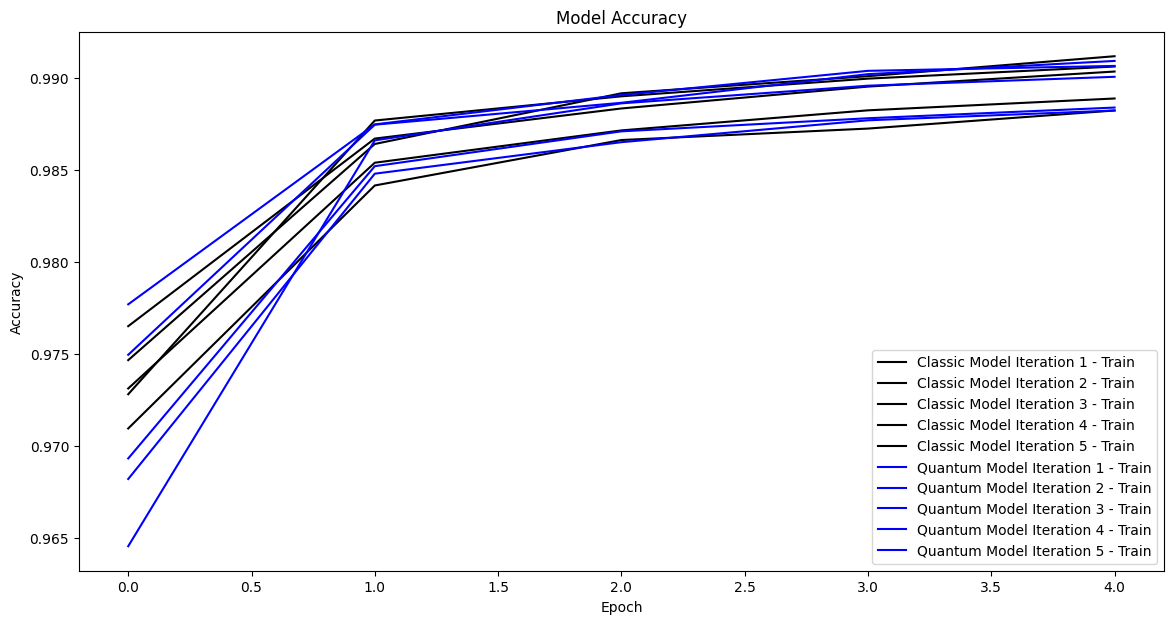

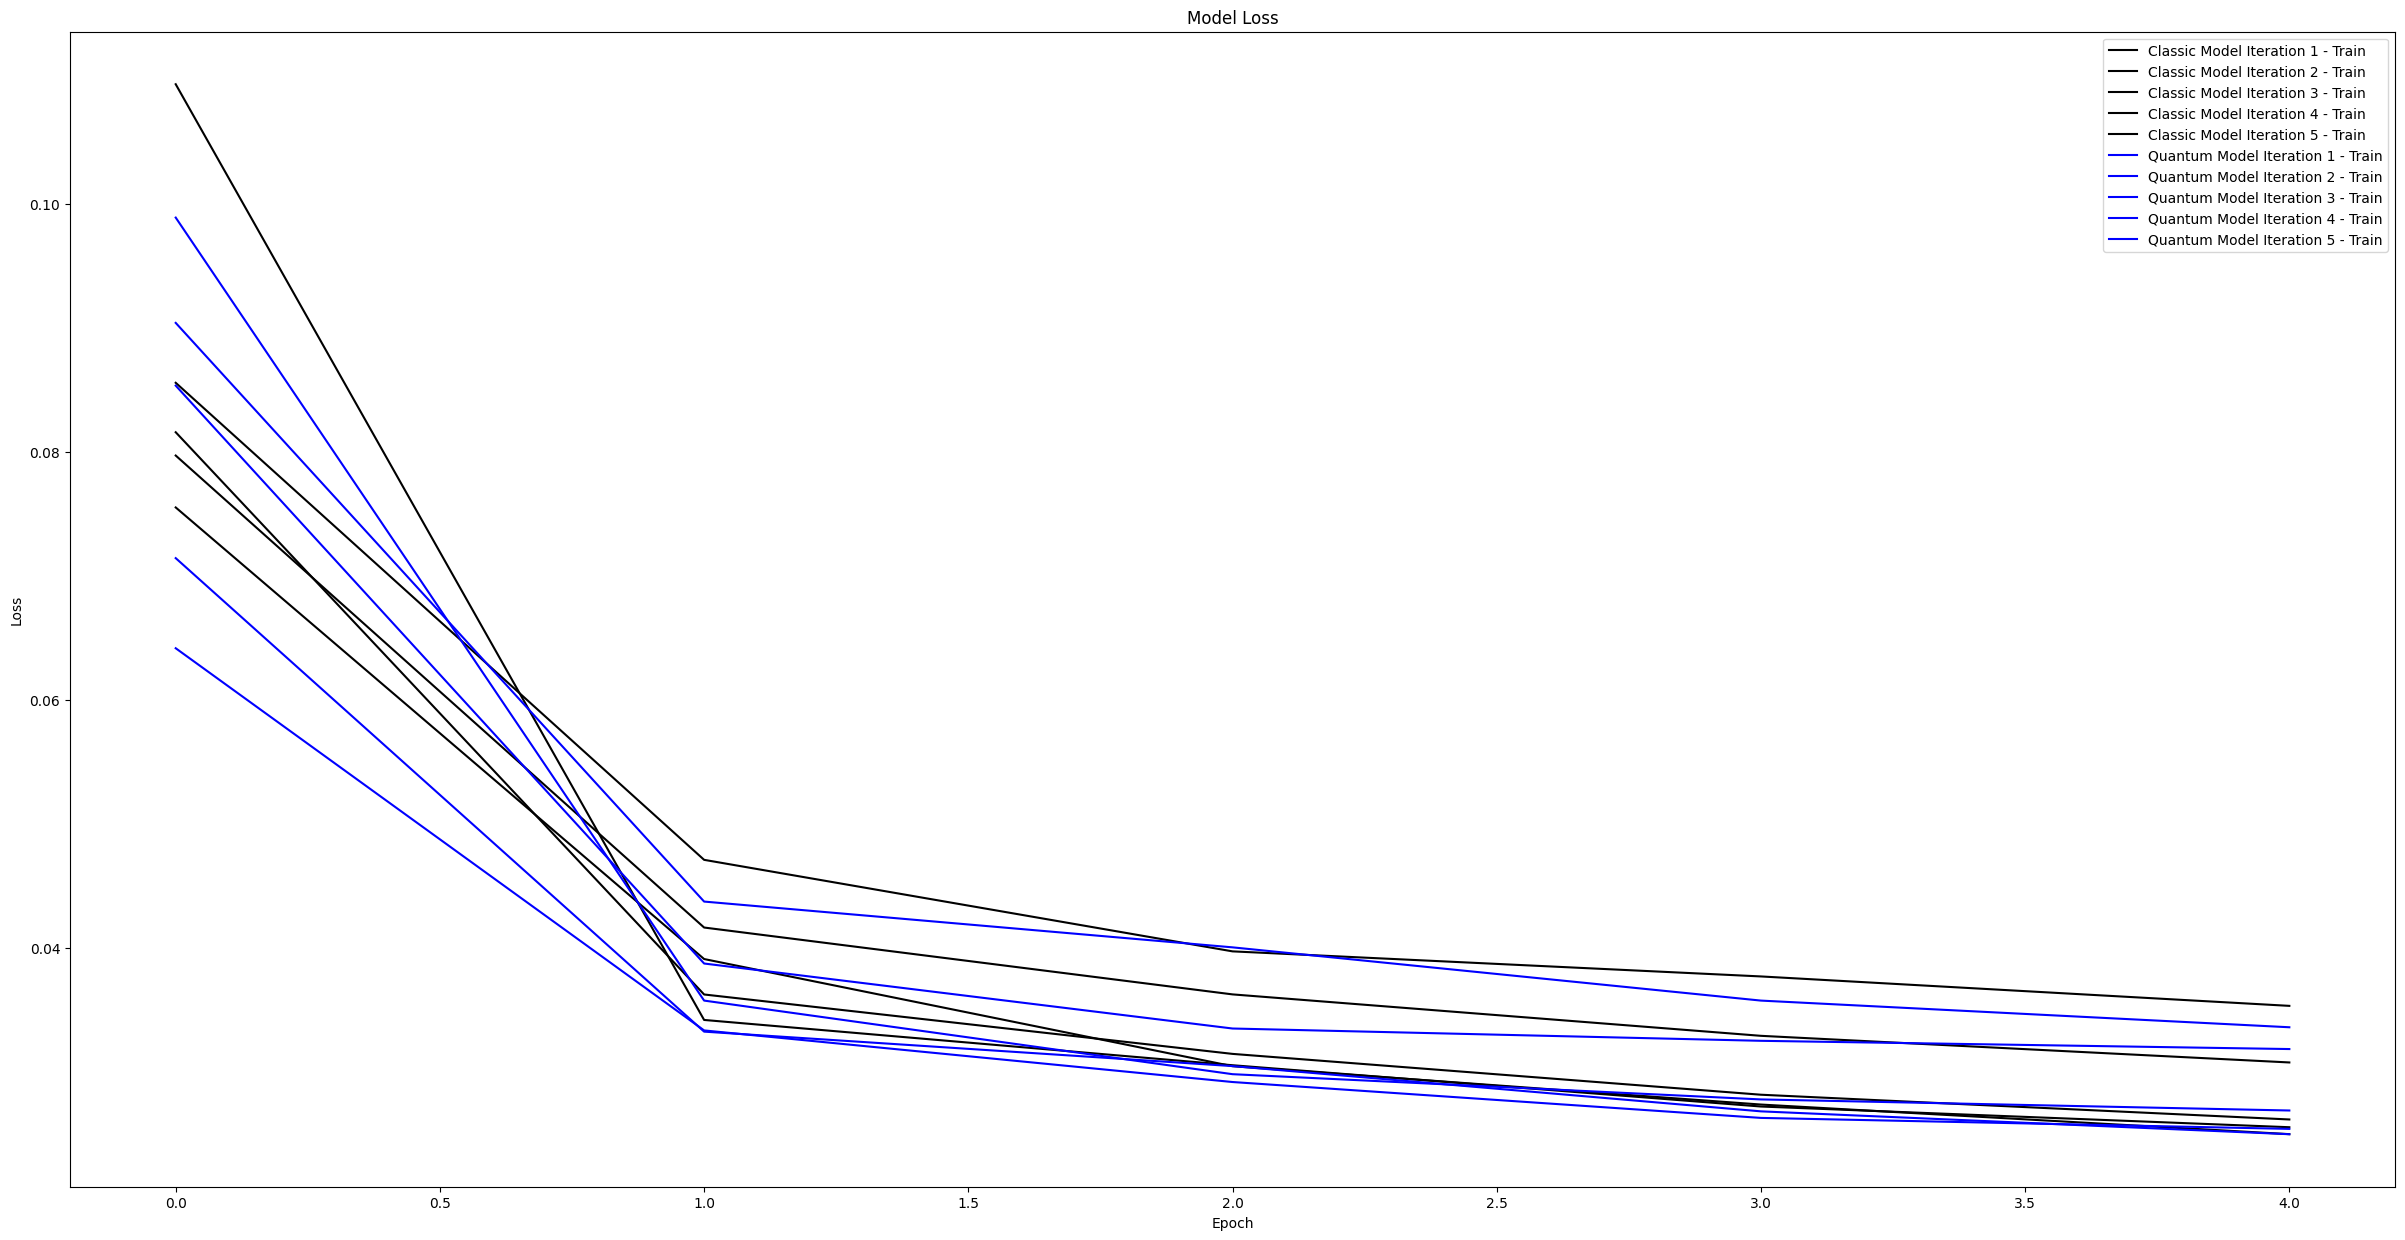

In [46]:
import glob

history_files = glob.glob("../experiment_12_long_layer/*_history.json")

# Initialize lists to store histories
classic_histories = []
quantum_histories = []

# Separate classic and quantum histories
for file in history_files:
    with open(file, "r") as f:
        history = json.load(f)
        if "classic_model" in file:
            classic_histories.append(history)
        else:
            quantum_histories.append(history)

# Plot the histories
plt.figure(figsize=(14, 7))

# Plot classic model accuracies
for i, history in enumerate(classic_histories):
    plt.plot(history['accuracy'], label=f'Classic Model Iteration {i+1} - Train', color='black', linestyle='-')

# Plot quantum model accuracies
for i, history in enumerate(quantum_histories):
    plt.plot(history['accuracy'], label=f'Quantum Model Iteration {i+1} - Train', color='blue', linestyle='-')

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss histories
plt.figure(figsize=(30, 15))

# Plot classic model losses
for i, history in enumerate(classic_histories):
    plt.plot(history['loss'], label=f'Classic Model Iteration {i+1} - Train', color='black', linestyle='-')

# Plot quantum model losses
for i, history in enumerate(quantum_histories):
    plt.plot(history['loss'], label=f'Quantum Model Iteration {i+1} - Train', color='blue', linestyle='-')

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()